# Other Topics in Classification

G. Richards
(2016, 2018, 2020)
based on materials from Connolly, VanderPlas, Geron, and Ivezic.

Particularly that will help us understand neural networks (Ivezic Section 9.8).  I found this video series particularly helpful in trying to simplify the explanation https://www.youtube.com/watch?v=bxe2T-V8XRs. Please watch the first 3 videos in the series before lecture.

A lot of the next 3 lectures will come from the book by [Geron](https://www.amazon.com/Hands-Machine-Learning-Scikit-Learn-TensorFlow/dp/1492032646/ref=sr_1_5?dchild=1&keywords=machine+learning&qid=1596499152&sr=8-5).  You can access it with your Drexel login through [O'Reilly](https://learning-oreilly-com.ezproxy2.library.drexel.edu/library/view/hands-on-machine-learning/9781492032632/titlepage01.html).  We aren't on the list for some reason, but just select that option and give your Drexel e-mail address.  However, if you think that you might spend any time working with neural networks beyond this course, it would be a worthwhile purchase.

In [4]:
import numpy as np
import matplotlib.pyplot as plt

### Loss Functions

A [loss function](https://en.wikipedia.org/wiki/Loss_functions_for_classification) is like the cost functions that we discussed earlier, except for a single training example rather than the full data set.

Whether you realize it or not, you are typically working with $l2$ loss functions:
$$(y-f(x))^2,$$
where the corresponding cost function is the mean of those for all $x_i$ or the Mean Squared Error (MSE).

We also talked about $l1$ loss functions:
$$|y-f(x)|,$$
which is more robust to outliers.

For classification we plot the loss vs. $y*f(x)$, where that is the known class (either $+1$ or $-1$) times the predicted value.  If that product is positive, we predict $+1$.  If it is negative, we predict $-1$.  

We define the loss to be zero for $y*f(x)=1$, that is, when we have gotten the right answer.

So what do the mean squared error (MSE or $l2$) and mean absolute error (MAE or $l1$) look like for classification?

In [5]:
# Mathematical formulas for various loss functions
def log_loss(raw_model_output):
   return np.log(1+np.exp(-raw_model_output))

def hinge_loss(raw_model_output):
   return np.maximum(0,1-raw_model_output)
 
def l2(raw_model_output):
   return (raw_model_output-1)**2  

def l1(raw_model_output):
   return np.abs(raw_model_output-1)  
 
def zero_one(raw_model_output):
   return np.where(raw_model_output < 0, 1, 0)   

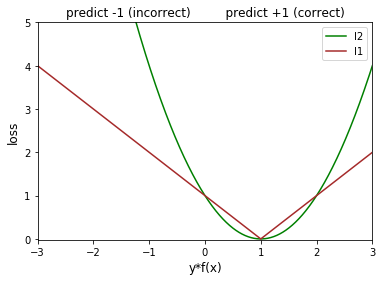

In [7]:
# Create a grid of values and plot
grid = np.linspace(-3,3,1000)
plt.plot(grid, l2(grid), "g", label='l2')
plt.plot(grid, l1(grid), "brown", label='l1')

# plt.fill_between([0,3],-0.02,5,"b",alpha=0.4)
# plt.fill_between([-3,0],-0.02,5,"r",alpha=0.5)
plt.xlim([-3,3])
plt.ylim([-0.02,5])
plt.xlabel("y*f(x)",fontsize=12)
plt.ylabel("loss",fontsize=12)
plt.title("predict -1 (incorrect)         predict +1 (correct)",fontsize=12)
plt.legend()

plt.show()

This does something reasonable for $y*f(x)\le1$.  However, look what happens at larger values (where we are even more confident that $y*f(x)$ is positive and that our class should be $+1$.  The loss goes **up**.  That's bad.

Now, you may be wondering how $y*f(x)$ can be larger than 1.  Me too.  The internet is filled with useless non-answers.  But here's how this works.

$f(x)$ isn't just a value between $-1$ and $1$, it is a function.  For example, let's say that our training data looks like this:

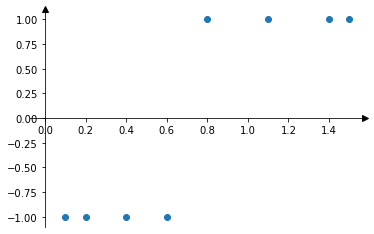

In [8]:
xx = np.array([0.1,0.2,0.4,0.6,0.8,1.1,1.4,1.5])
yy = np.array([-1,-1,-1,-1,1,1,1,1])

#with plt.xkcd():
if 1:
    
    fig = plt.figure(1)
    ax = fig.add_subplot(1, 1, 1)

    # Move left y-axis and bottim x-axis to centre, passing through (0,0)
    ax.spines['left'].set_position(('axes',0.045))
    ax.spines['bottom'].set_position('center')

    # Eliminate upper and right axes
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')

    # Show ticks in the left and lower axes only
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    
    ax.plot(1, 0, ">k", transform=ax.get_yaxis_transform(), clip_on=False)
    ax.plot(0, 1, "^k", transform=ax.get_xaxis_transform(), clip_on=False)
        
    ax.scatter(xx,yy)

Now let's fit a linear model to the training data:

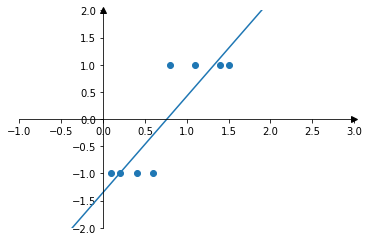

In [9]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
linreg.fit(xx[:,None],yy)
ypred = linreg.predict(grid[:,None])

if 1:
    
    fig = plt.figure(1)
    ax = fig.add_subplot(1, 1, 1)

    # Move left y-axis and bottim x-axis to centre, passing through (0,0)
    ax.spines['left'].set_position(('axes',0.25))
    ax.spines['bottom'].set_position('center')

    # Eliminate upper and right axes
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')

    # Show ticks in the left and lower axes only
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    
    ax.plot(1, 0, ">k", transform=ax.get_yaxis_transform(), clip_on=False)
    ax.plot(0, 1, "^k", transform=ax.get_xaxis_transform(), clip_on=False)
    
    ax.plot(grid,ypred)
    ax.set_xlim([-1,3])
    ax.set_ylim([-2,2])
        
    ax.scatter(xx,yy)

We see that for $x$ greater than about 1.3, $f(x)$ can indeed be larger than 1 and so can $y*f(x)$, which is indicating an increased certainty of the $+1$ class. 

OK, so now we can understand the plot, but we still need a loss function that makes sense for classification.

The first we'll try is the so-called ["Zero-One"](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.zero_one_loss.html) loss shown in **black**.  It is 1 for $yf(x)<0$ and 0 for $yf(x)>0$; thus the name.  You increment the loss function by 1 every time you make a wrong prediction.  It is just a count of the total number of mistakes.

However, the Zero-One loss is hard to minimize, so instead we can try something that allows the loss to be continuous function in $y*f(x)$.  

For example, the [Hinge Loss](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.hinge_loss.html), which looks like
$${\rm max}(0,1-y*f(x)),$$
as plotted in **orange**.  Here there is no contribution to the loss for values $\ge 1$, but there is an linearly increasing loss for smaller values.  So, it penalizes both wrong predictions and also correct predictions that have low confidence.

A [logistic loss](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.log_loss.html#sklearn.metrics.log_loss) (also called the log loss and cross entropy loss) function has similar properties as shown in **blue**, but is smoother and has slightly less and less penalty for more and more confident $+1$ predictions.

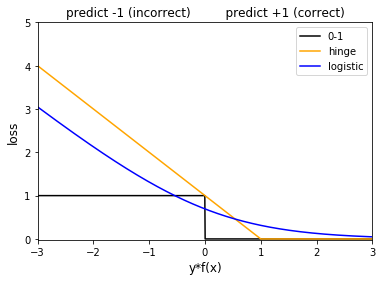

In [12]:
# Create a grid of values and plot
grid = np.linspace(-3,3,1000)
#plt.plot(grid, log_loss(grid), label='logistic')
plt.plot(grid, zero_one(grid), "k", label='0-1')
plt.plot(grid, hinge_loss(grid), "orange", label='hinge')
plt.plot(grid, log_loss(grid), "b", label='logistic')
#plt.plot(grid, l2(grid), label='l2')
#plt.plot(grid, l1(grid), label='l1')

# plt.fill_between((0,3),-0.02,5,"b",alpha=0.4)
# plt.fill_between((-3,0),-0.02,5,"r",alpha=0.5)
plt.xlim([-3,3])
plt.ylim([-0.02,5])
plt.xlabel("y*f(x)",fontsize=12)
plt.ylabel("loss",fontsize=12)
plt.title("predict -1 (incorrect)         predict +1 (correct)",fontsize=12)
plt.legend()

plt.show()

For more see [Linear Classsifiers in Python course](https://learn.datacamp.com/courses/linear-classifiers-in-python).  Also

https://datascience103579984.wordpress.com/2019/09/18/linear-classifiers-in-python-from-datacamp/

https://towardsdatascience.com/common-loss-functions-in-machine-learning-46af0ffc4d23

https://www.analyticsvidhya.com/blog/2019/08/detailed-guide-7-loss-functions-machine-learning-python-code

http://www.datasciencecourse.org/notes/linear_classification/

### Gradient Descent

That brings us to the topic of [Gradient Descent](https://en.wikipedia.org/wiki/Gradient_descent) which comes in for log loss because there is no analytic solution (can't write the equation for $\theta$ as we have been).

Throughout the couse we have been trying to determine model parameters, $\theta$, that minimize either the regression error or the classification error when fitting our training data (and not overfitting!). 

Sometimes we have been able to write an analytic solution for $\theta$.  In MCMC we semi-randomly sampled the multi-dimensional $\theta$ space to find the best answer (and map the full parameter space along the way).  But what happens if you are stuck on top of a freezing cold mountain and you have no map and can't magically jump from place to place?  You start walking **down**.  That's the basic idea of gradient descent--take a look around you, figure out which way is sloping downward the most and go *that* way.

We are going to determine the local gradient of the loss function with respect to $\theta$ and go in the steepest direction, until the gradient is zero (and we have arrived at our destination).

Mathematically, we have 

$$\nabla_{\theta}{\rm MSE}({\mathbf \theta}) = \frac{2}{N}X^T(X\theta - y)$$

That gives the uphill direction, so we compute the next step as

$$\theta^{\rm next step} = \theta - \eta\nabla_{\theta}{\rm MSE}({\mathbf \theta}),$$

where $\eta$ is the "learning rate" and the rest are all matrices or vectors.

Note that the initial values for $\theta$ are chosen randomly.


The [learning rate](https://en.wikipedia.org/wiki/Learning_rate), which controls how big your steps "down" are.  If your step size is too small, it will take too long to converge.  If it is too big, you might miss the bottom completely (and possibly end up diverging from the solution).  


![https://miro.medium.com/max/1400/0*GaO7X6j3coh3oNwf.png](https://miro.medium.com/max/1400/0*GaO7X6j3coh3oNwf.png)

We also have to be careful that we don't end up in a local minimum instead of the global minimum.  (One of the nice things about the $l2$ cost function is that it is guaranteed to have just a single global minimum.

Diverges because the sign of the gradient was opposite to what it just was?

Note that gradient descent is also useful for regression where too many training points (or too many features) to fit into memory.

Here's an example from Geron where we apply gradient descent to a simple linear regression problem.

In [13]:
#Run the next 4 cells
#N points randomly drawn from a linear distribution
N=100
X = 2 * np.random.rand(N, 1)
y = 4 + 3 * X + np.random.randn(N, 1)

#Turn X into a matrix
X_b = np.c_[np.ones((100, 1)), X]  # add x0 = 1 to each 

#Grid for plotting
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]  # add x0 = 1 to each instance

X_b = np.c_[np.ones((100, 1)), X]  # add x0 = 1 to each instance

In [14]:
eta = 0.1  # learning rate
n_iterations = 100
theta = np.random.randn(2,1)  # random initialization

for iteration in range(n_iterations):
    gradients = 2/N * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [15]:
n_lines=10
color_idx = np.linspace(0, 1, n_lines)
#Helper function
theta_path_bgd = []
def plot_gradient_descent(theta, eta, theta_path=None):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            #style = "b-" if iteration > 0 else "r--"
            #plt.plot(X_new, y_predict, style)
            plt.plot(X_new, y_predict, color=plt.cm.cool(color_idx[iteration]))
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)

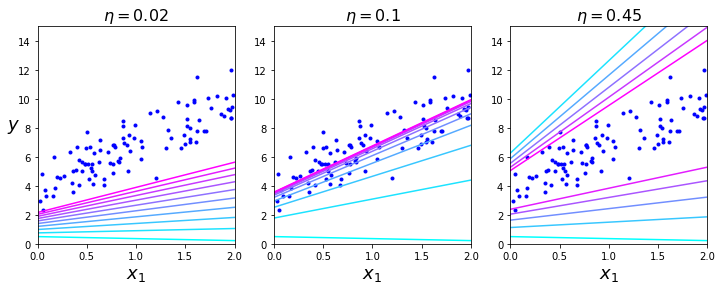

In [18]:
np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization
plt.figure(figsize=(12,4))
plt.subplot(131); plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132); plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd)
plt.subplot(133); plot_gradient_descent(theta, eta=0.45)
plt.show()

On the left our learning rate is too low; we'll eventually get to the solution, but it will take a long time.  On the right it is too high and we have completely missed the solution.  In the middle is just right.

Try $\eta = 0.3$ and $0.4$ to see if you can understand what is going on in the right panel.

---

### AdaBoost

I didn't talk about [AdaBoost](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html) or [Gradient Boosting](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html?highlight=gradient%20boosting#sklearn.ensemble.GradientBoostingClassifier) last time because I thought it made sense to have the above discussion first.

Below is an example of AdaBoost from Geron.  See what happens when you change the learning rate, where half the learning rate means that weights are boosted half as much for each iteration.

In [19]:
#Run the next 3 cells
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=500, noise=0.30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [20]:
#Helper function for plotting
from matplotlib.colors import ListedColormap
def plot_decision_boundary(clf, X, y, axes=[-1.5, 2.45, -1, 1.5], alpha=0.5, contour=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if contour:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", alpha=alpha)
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", alpha=alpha)
    plt.axis(axes)
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.ylabel(r"$x_2$", fontsize=18, rotation=0)

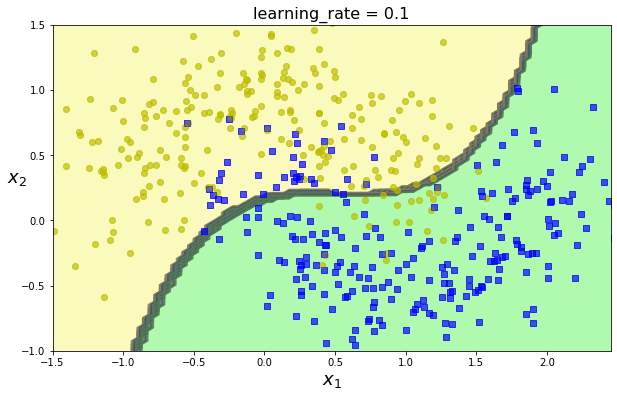

In [22]:
learning_rate=0.1

m = len(X_train)
from sklearn.svm import SVC
fix, axes = plt.subplots(ncols=1, figsize=(10,6))
sample_weights = np.ones(m)
for i in range(5):
    svm_clf = SVC(kernel="rbf", C=0.05, gamma="scale", random_state=42)
    svm_clf.fit(X_train, y_train, sample_weight=sample_weights)
    y_pred = svm_clf.predict(X_train)
    sample_weights[y_pred != y_train] *= (1 + learning_rate)
    plot_decision_boundary(svm_clf, X, y, alpha=0.2)
    plt.title("learning_rate = {}".format(learning_rate), fontsize=16)
plt.show()

Try some learning rates between $0.1$ and $1.0$.  It is important to note the order of these decision boundaries; that is, are they diverging?

---

### Logistic Regression

Before we start on Neural Networks, let's talk about [Logistic Regression](https://en.wikipedia.org/wiki/Logistic_regression), which is actually used for classification.

In logistic regression, we take our output and pass it through the logistic function to determine the output, where the logistic function is 

$$\sigma(t) = \frac{1}{1+e^{-t}},$$
which is similar to the log loss function we saw above.

Positive output values have $+1$ class probability greater than 50% and are classified as $+1$, while negative output values have $+1$ class probability less than 50% and are classified as $-1$.  The logistic function provides for a smooth transition in probability between the classes as a function of our output as illustrated below.

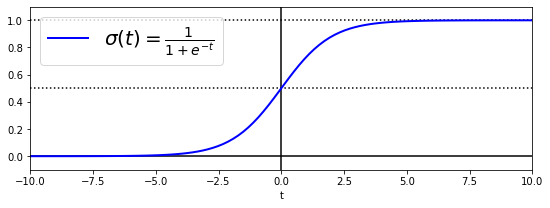

In [23]:
#Geron
t = np.linspace(-10, 10, 100)
sig = 1 / (1 + np.exp(-t))
plt.figure(figsize=(9, 3))
plt.plot([-10, 10], [0, 0], "k-")
plt.plot([-10, 10], [0.5, 0.5], "k:")
plt.plot([-10, 10], [1, 1], "k:")
plt.plot([0, 0], [-1.1, 1.1], "k-")
plt.plot(t, sig, "b-", linewidth=2, label=r"$\sigma(t) = \frac{1}{1 + e^{-t}}$")
plt.xlabel("t")
plt.legend(loc="upper left", fontsize=20)
plt.axis([-10, 10, -0.1, 1.1])
plt.show()

We'll try it on the iris dataset, where we will consider just 2 classes: virginica and *not* virginica and just 1 feature (petal width).

In [24]:
from sklearn import datasets
iris = datasets.load_iris()

X = iris["data"][:, 3:]  # petal width
y = (iris["target"] == 2).astype(np.int)  # 1 if Iris virginica, else 0

from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver="lbfgs", random_state=42)
log_reg.fit(X, y)

LogisticRegression(random_state=42)

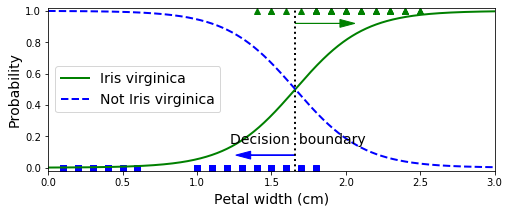

In [25]:
X_grid = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_grid)

decision_boundary = X_grid[y_proba[:, 1] >= 0.5][0]

plt.figure(figsize=(8, 3))
plt.plot(X[y==0], y[y==0], "bs")
plt.plot(X[y==1], y[y==1], "g^")
plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth=2)
plt.plot(X_grid, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica")
plt.plot(X_grid, y_proba[:, 0], "b--", linewidth=2, label="Not Iris virginica")
plt.text(decision_boundary+0.02, 0.15, "Decision  boundary", fontsize=14, color="k", ha="center")
plt.arrow(decision_boundary, 0.08, -0.3, 0, head_width=0.05, head_length=0.1, fc='b', ec='b')
plt.arrow(decision_boundary, 0.92, 0.3, 0, head_width=0.05, head_length=0.1, fc='g', ec='g')
plt.xlabel("Petal width (cm)", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 3, -0.02, 1.02])

plt.show()

Here we see that flowers having petal width larger than 1.6cm get classified as virginica, but that there are 5 examples that are misclassified.

We can also look at the decision boundary in 2-D to see if adding another feature helps.

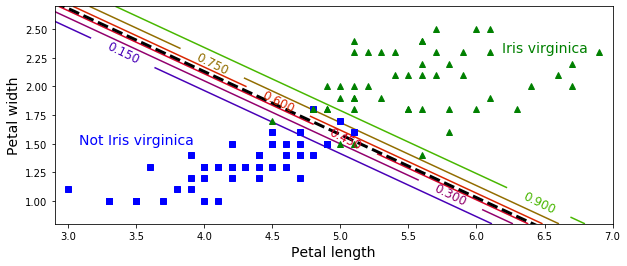

In [26]:
from sklearn.linear_model import LogisticRegression

X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(np.int)

log_reg = LogisticRegression(solver="lbfgs", C=10**10, random_state=42)
log_reg.fit(X, y)

x0, x1 = np.meshgrid(
        np.linspace(2.9, 7, 500).reshape(-1, 1),
        np.linspace(0.8, 2.7, 200).reshape(-1, 1),
    )
X_grid = np.c_[x0.ravel(), x1.ravel()]

y_proba = log_reg.predict_proba(X_grid)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs")
plt.plot(X[y==1, 0], X[y==1, 1], "g^")

zz = y_proba[:, 1].reshape(x0.shape)
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)


left_right = np.array([2.9, 7])
boundary = -(log_reg.coef_[0][0] * left_right + log_reg.intercept_[0]) / log_reg.coef_[0][1]

plt.clabel(contour, inline=1, fontsize=12)
plt.plot(left_right, boundary, "k--", linewidth=3)
plt.text(3.5, 1.5, "Not Iris virginica", fontsize=14, color="b", ha="center")
plt.text(6.5, 2.3, "Iris virginica", fontsize=14, color="g", ha="center")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.axis([2.9, 7, 0.8, 2.7])

plt.show()

Adding the second feature didn't really help, but we can see that the misclassifications are all in the region where there is intermediate probability.  Really that's half the battle.  It is OK to be wrong as long as you have some sense that that might be the case.

The loss function for training our logistic regression algorithm is a "log loss", which looks like

$$-\log(p), {\rm if} y=1$$
$$-\log(1-p), {\rm if} y=-1$$ 

So, if the model estimates a $+1$ class with probability near 0, the misclassification cost will be very high.  High probability of class $+1$ has nearly 0 cost.  For a training object in class $-1$, if the model estimates a $+1$ class with low probability, then the cost is low, while a high $+1$ class probability gives a high cost.

In one line, we can write it as

$$-\frac{1}{N}\Sigma\left[y_i\log(p_i) + (1-y_i)\log(1-p_i)\right].$$

One of the reasons that we introduced gradient descent above is that this function has no analytic solution.  However, it does have a single minimum so gradient descent is guaranteed to work (with an appropriate learning rate).

If we wanted to classify all three iris at once and not just do binary classification, then we would instead use a [softmax function](https://en.wikipedia.org/wiki/Softmax_function) instead of the logistic function and cross entropy for training.  But that's a topic for either later or your own exploration.

---

That gives us some background to start talking about Neural Networks.


# Neural Networks

G. Richards
(2016, 2018, 2020)
Ivezic 9.8

where I found this video series particularly helpful in trying to simplify the explanation https://www.youtube.com/watch?v=bxe2T-V8XRs. 

[Artificial Neural Networks](https://en.wikipedia.org/wiki/Artificial_neural_network) are a simplified computation architecture based loosely on the real neural networks found in brains.  In reality, what we are going to explore is a [multi-layer perceptron](https://en.wikipedia.org/wiki/Multilayer_perceptron).

In the image below the circles on the left represent the **attributes** of our input data, $X$, which here is 3 dimensional.  The circles in the middle represent the neurons.  They take in the information from the input and, based on some criterion decide whether or not to "fire".  The collective results of the neurons in the hidden layer produce the output, $y$, which is represented by the circles on the right, which here is 2 dimensional result.  The lines connecting the circles represent the synapses.  This is a simple example with just one layer of neurons; however, there can be many layers of neurons.
![Cartoon of Neural Network](https://upload.wikimedia.org/wikipedia/commons/thumb/e/e4/Artificial_neural_network.svg/500px-Artificial_neural_network.svg.png)

In more detail:

The job of a synapses is to take input values and multiply them by some weight before passing them to the neuron (hidden layer):

$$z = \sum_i w x_i$$

The neuron then sums up the inputs from all of the synapses connected to it and applies an "activation function".  For example a [sigmoid](https://en.wikipedia.org/wiki/Sigmoid_function) activation function (which is the same function we just saw being used in Logistic Regression).

$$a = \frac{1}{1+e^{-z}}.$$

![Sigmoid Function](https://upload.wikimedia.org/wikipedia/commons/thumb/8/88/Logistic-curve.svg/500px-Logistic-curve.svg.png)

What the neural network does is to learn the weights of the synapses that are needed to produce an accurate model of $y_{\rm train}$.

Rather than think about the inputs individually, we can write this process in matrix form as
$$X W^{(1)} = Z^{(2)}.$$

If $D$ is the number of attributes (here 3) and $H$ is the number of neurons in the hidden layer (here 4), then $X$ is an $N\times D$ matrix, while $W^{(1)}$ is a $D\times H$ matrix.  The result, $Z^{(2)}$, is then an $N\times H$ matrix.

We then apply the activation function to each entry of $Z^{(2)}$ independently: 
$$A^{(2)} = f(Z^{(2)}),$$
where $A^{(2)}$ is the output of the neurons in the hidden layer and is also $N\times H$.

These values are then the inputs for the next set of synapses, where we multiply the inputs by another set of weights, $W^{(2)}:$
$$A^{(2)} W^{(2)} = Z^{(3)},$$

where $W^{(2)}$ is an $H\times O$ matrix and $Z^{(3)}$ is an $N\times O$ matrix with $O$-dimensional output.

Another activation function is then applied to $Z^{(3)}$ to give
$$\hat{y} = f(Z^{(3)}),$$
which is our estimator of $y$.

This is a [feedforward](https://en.wikipedia.org/wiki/Feedforward_neural_network) neural network.

For example we might have $N=100$ people for which we have measured 
* shoe size
* belt size
* hat size

for whom we know their height and mass.  

Then we are going to use this to predict the height and mass for people where we only know shoe size, belt size, and hat size.

The neural network then essentially boils down to determining the weights of the synapses, which are usually initialized randomly.

We do that by minimizing the cost function (which compares the true values of $y$ to our predicted values).  Typically:
$$ {\rm Cost} = J = \sum\frac{1}{2}(y - \hat{y})^2.$$

As we saw above, that would be a cost function for regression (where we have only one output node).  For classification, we'd use one of the examples above (but ideally one that is differentiable as we'll see next time).

If we just had 1 weight and we wanted to check 1000 possible values, that wouldn't be so bad.  But we have 20 weights, which means checking $20^{1000}$ possible combinations.    Remember the curse of dimensionality?  That might take a while.  Indeed, far, far longer than the age of the Universe.

Thus the (first) death of neural networks (which are currently on life #3, which is looking more promising).


Life #2 begins with the realization that we can write an analytic formula for the *gradient* going backwards and use that to update our weights.

For example, how about just checking 3 points for each weight and see if we can at least figure out which way is "down hill"?  That's a start.

We can rewrite $J$ as
$$ J = \sum\frac{1}{2}\left(y - f\left( f(X W^{(1)}) W^{(2)} \right) \right)^2$$

and then compute
$$\frac{\partial J}{\partial W}$$
in order to determine the slope of the cost function for each weight.  This is the **gradient descent** method, which we encountered above.  Your choice of cost function is important here; specifically you want it to be differentiable.

We'll want $\partial J/\partial W^{(1)}$ and $\partial J/\partial W^{(2)}$ separately.  This allows us to [*backpropagate*](https://en.wikipedia.org/wiki/Backpropagation) the error contributions along each neuron and to change the weights where they most need to be changed.  It is like each observation gets a vote on which way is "down hill".  We compute the vector sum to decide the ultimate down hill direction.

Once we know the down hill direction from the derivative, we update the weights by subtracting a scalar times that derivative from the original weights.  That's obviously much faster than randomly sampling all the possible combinations of weights.  Once the weights are set, then you have your Neural Network classifier/regressor.

![Cartoon of Neural Network](https://upload.wikimedia.org/wikipedia/commons/thumb/e/e4/Artificial_neural_network.svg/500px-Artificial_neural_network.svg.png)

Scikit-Learn has both [unsupervised Neural Network](http://scikit-learn.org/stable/modules/neural_networks_unsupervised.html#neural-networks-unsupervised) and [supervised Neural Network](http://scikit-learn.org/stable/modules/neural_networks_supervised.html#neural-networks-supervised) examples. 

Let's try to use the multi-layer perceptron classifier on the Boston House Price dataset (using 75% of the data for training and 25% for testing).

In [ ]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

boston = load_boston()
#print boston.DESCR

X = boston.data
y = boston.target

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.25, random_state=42)

from sklearn import preprocessing
Xtrain_scaled = preprocessing.scale(Xtrain)
Xtest_scaled = preprocessing.scale(Xtest)
Xscaled = preprocessing.scale(X)

In [ ]:
from sklearn.neural_network import MLPRegressor
clf = MLPRegressor(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5,2), random_state=1, max_iter=5000)
clf.fit(Xtrain_scaled, ytrain)

# Look at the weights
print([coef.shape for coef in clf.coefs_])

ypred = clf.predict(Xtest_scaled)
#print ypred, ytest

fig = plt.figure(figsize=(6, 6))
plt.scatter(ytest,ypred)
plt.xlabel("Actual Value [x$1000]")
plt.ylabel("Predicted Value [x$1000]")
plt.show()

Of course, that only predicts the value for a fraction of the data set.  Again, we can use Scikit-Learn's [cross_val_predict](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_predict.html#sklearn.model_selection.cross_val_predict) to make predictions for the full data set.

In [ ]:
from sklearn.model_selection import cross_val_predict

yCVpred = cross_val_predict(clf, Xscaled, y, cv=10) # Complete

fig = plt.figure(figsize=(6, 6))
plt.scatter(y,yCVpred)
plt.xlabel("Actual Value [x$1000]")
plt.ylabel("Predicted Value [x$1000]")
plt.show()

We can also use cross validation to figure out how many hidden layers and neurons to use.  We'll set the number of layers to 2 and the number of neurons in the 2nd layer to 2 as well, then figure out the best number of neurons for the first layer.

In [ ]:
from sklearn.model_selection import cross_val_score

hidden_size = np.arange(3,12)
scores = np.array([])
for sz in hidden_size:
    clf = MLPRegressor(solver='lbfgs', alpha=1e-5, random_state=0, hidden_layer_sizes=(sz,2), max_iter=5000)
    scores = np.append(scores, np.mean(cross_val_score(clf, Xscaled, y, cv=5)))
    
#plt.plot(hidden_size,scores)
fig = plt.figure()
ax = plt.gca()
ax.plot(hidden_size,scores,'x-')
plt.show()

More on the number of layers, number of neurons, and other details next time.